In [2]:
from random import randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

### Use pandas to read csv file

In [3]:
weather = pd.read_csv('weather_data.csv')
temperature_data_df = weather[['Humidity', 'Temperature (C)']]
temperature_data_df.columns = ['humidity', 'temperature']

In [4]:
temperature_data_df.head(9)

,humidity,temperature
0,0.89,9.472222
1,0.86,9.355556
2,0.89,9.377778
3,0.83,8.288889
4,0.83,8.755556
5,0.85,9.222222
6,0.95,7.733333
7,0.89,8.772222
8,0.82,10.822222


#### Splitting data into train and test sets

In [5]:
random_sample_divider = randint(6500, 7000)

In [6]:
train_x, test_x = np.asanyarray(temperature_data_df[['humidity']][:random_sample_divider]), np.asanyarray(temperature_data_df[['humidity']][random_sample_divider:])
train_y, test_y = np.asanyarray(temperature_data_df[['temperature']][:random_sample_divider]), np.asanyarray(temperature_data_df[['temperature']][random_sample_divider:])

#### Using sklearn LinearRegression model to generate coefficients and intercept

In [7]:
lin_model = linear_model.LinearRegression()
lin_model.fit(train_x, train_y)
print('Coeffiecint:', lin_model.coef_)
print('Intercept:', lin_model.intercept_)

Coeffiecint: [[-33.92548113]]
Intercept: [36.89103435]


In [8]:
def get_y(x):
    return lin_model.coef_[0][0]*x + lin_model.intercept_[0]

In [9]:
def print_fit_line():
    plt.scatter(train_x, train_y)
    plt.plot(train_x, get_y(train_x), '-r')
    plt.xlabel('Humidity')
    plt.ylabel('Temperature')

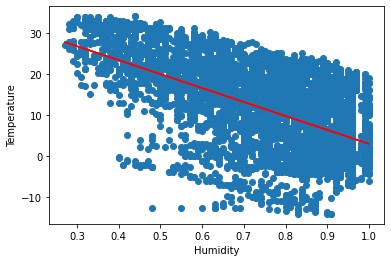

In [10]:
print_fit_line()

#### Using trained linear model to predict temperature on test data

In [11]:
test_y_pred = lin_model.predict(test_x)

In [12]:
def get_cost(test_y, test_y_pred):
    d_sq = (test_y_pred - test_y)**2
    r_mean = np.sqrt(np.mean(d_sq))
    return r_mean

#### Calculating cost of the linear model using existing test data and predicted test data

In [14]:
cost = get_cost(test_y_pred, test_y)
print(cost)

6.3602269580939454
